## Fig S1

In [36]:
ls deconv_benchmark/test.csv

deconv_benchmark/test.csv


In [46]:
df = pd.read_csv('deconv_benchmark/test.csv', index_col=0)

In [47]:
df['size'] = df['name'].str.split('.').str.len()
df['name1'] = df['name'].str[4:-4]

df['NormTrans'] = df['name1'].str.split('.').str[-1]
df['method'] = df['name1'].str.split('.').str[-4]
df['marker_strategy'] = df['name1'].str.split('.').str[-5]
df['normalization'] = df['name1'].str.split('.').str[-6]
df['deconv_type'] = df['name1'].str.split('.').str[-7]
df['transformation'] = df['name1'].str.split('.').str[-8]
df['pbmode'] = df['name1'].str.split('.').str[-9]
df['propsample'] = df['name1'].str.split('.').str[-10]
df['sampleCT'] = df['name1'].str.split('.').str[-11]
df['number_cells'] = df['name1'].str.split('.').str[-12]
df['data'] = df['name1'].str.split('.').str[:-12].str.join('.')
df['sim'] = df['data'].str.contains('type_batch')
df['rds'] = df['name'].str.split('.').str[1:-9].str.join('.')


In [48]:
df = df[df['number_cells']=='10000']

df = df[df['sim']==False]

df = df[df['sampleCT']=='F']

df = df[df['size']==16]

df = df[df['normalization']=='TMM']

In [58]:
df = df[df['pbmode']=='2']

In [61]:
df

,RMSE,mRMSE,Pearson,mPearson,name,size,name1,NormTrans,method,marker_strategy,normalization,deconv_type,transformation,pbmode,propsample,sampleCT,number_cells,data,sim,rds
2292,3203.6158,3203.575010,-0.0054,0.001009,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.CD...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.CDSeq....,T,CDSeq,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2293,2926.1052,2926.068287,0.0968,0.096783,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.DC...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DCQ.no...,T,DCQ,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2294,3204.3277,3204.287068,0.6719,0.671923,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.de...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.deconf...,T,deconf,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2295,2925.9569,2925.920020,0.9355,0.935475,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.De...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DeconR...,T,DeconRNASeq,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
2296,3204.4647,3204.424051,0.1037,0.103737,t.p.Adams2020.10000.F.T.2.none.bulk.TMM.all.DS...,16,Adams2020.10000.F.T.2.none.bulk.TMM.all.DSA.no...,T,DSA,all,TMM,bulk,none,2,T,F,10000,Adams2020,False,p.Adams2020.10000.F.T.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24354,848.9223,848.899320,0.7323,0.724649,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,BisqueRNA,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24355,848.9624,848.939443,0.1528,0.139010,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,CPM,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24356,848.9039,848.880878,0.9849,0.984910,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,MuSiC,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2
24357,848.9194,848.896397,0.8840,0.883982,t.p.ZilionisMouse2019fine.10000.F.T.2.none.sc....,16,ZilionisMouse2019fine.10000.F.T.2.none.sc.TMM....,T,SCDC,TMM,TMM,sc,none,2,T,F,10000,ZilionisMouse2019fine,False,p.ZilionisMouse2019fine.10000.F.T.2


In [69]:
df['1/RMSE'] = 1.0/df['RMSE']

In [85]:
ds = df['data'].value_counts()
ds = ds[ds>21]

In [87]:
df = df[df['data'].isin(ds.index)]

In [99]:
df['method']=df['method'].astype('category')

In [108]:
df['method']=df['method'].cat.reorder_categories(['FARDEEP', 'MuSiC','nnls','RLR','EpiDISH',\
                                                   'OLS', 'EPIC',   \
                                                  'elasticNet', 'lasso','proportionsInAdmixture','ridge',\
                                                  'CIBERSORT','SCDC','BisqueRNA', 'CDSeq',  'CPM', 'DCQ', 'DSA', 'DeconRNASeq',
        'TIMER',
       'deconf', 'dtangle',  'ssFrobenius', 'ssKL'])

In [114]:
df['Pearson'] = df['Pearson'].astype(float)

In [100]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

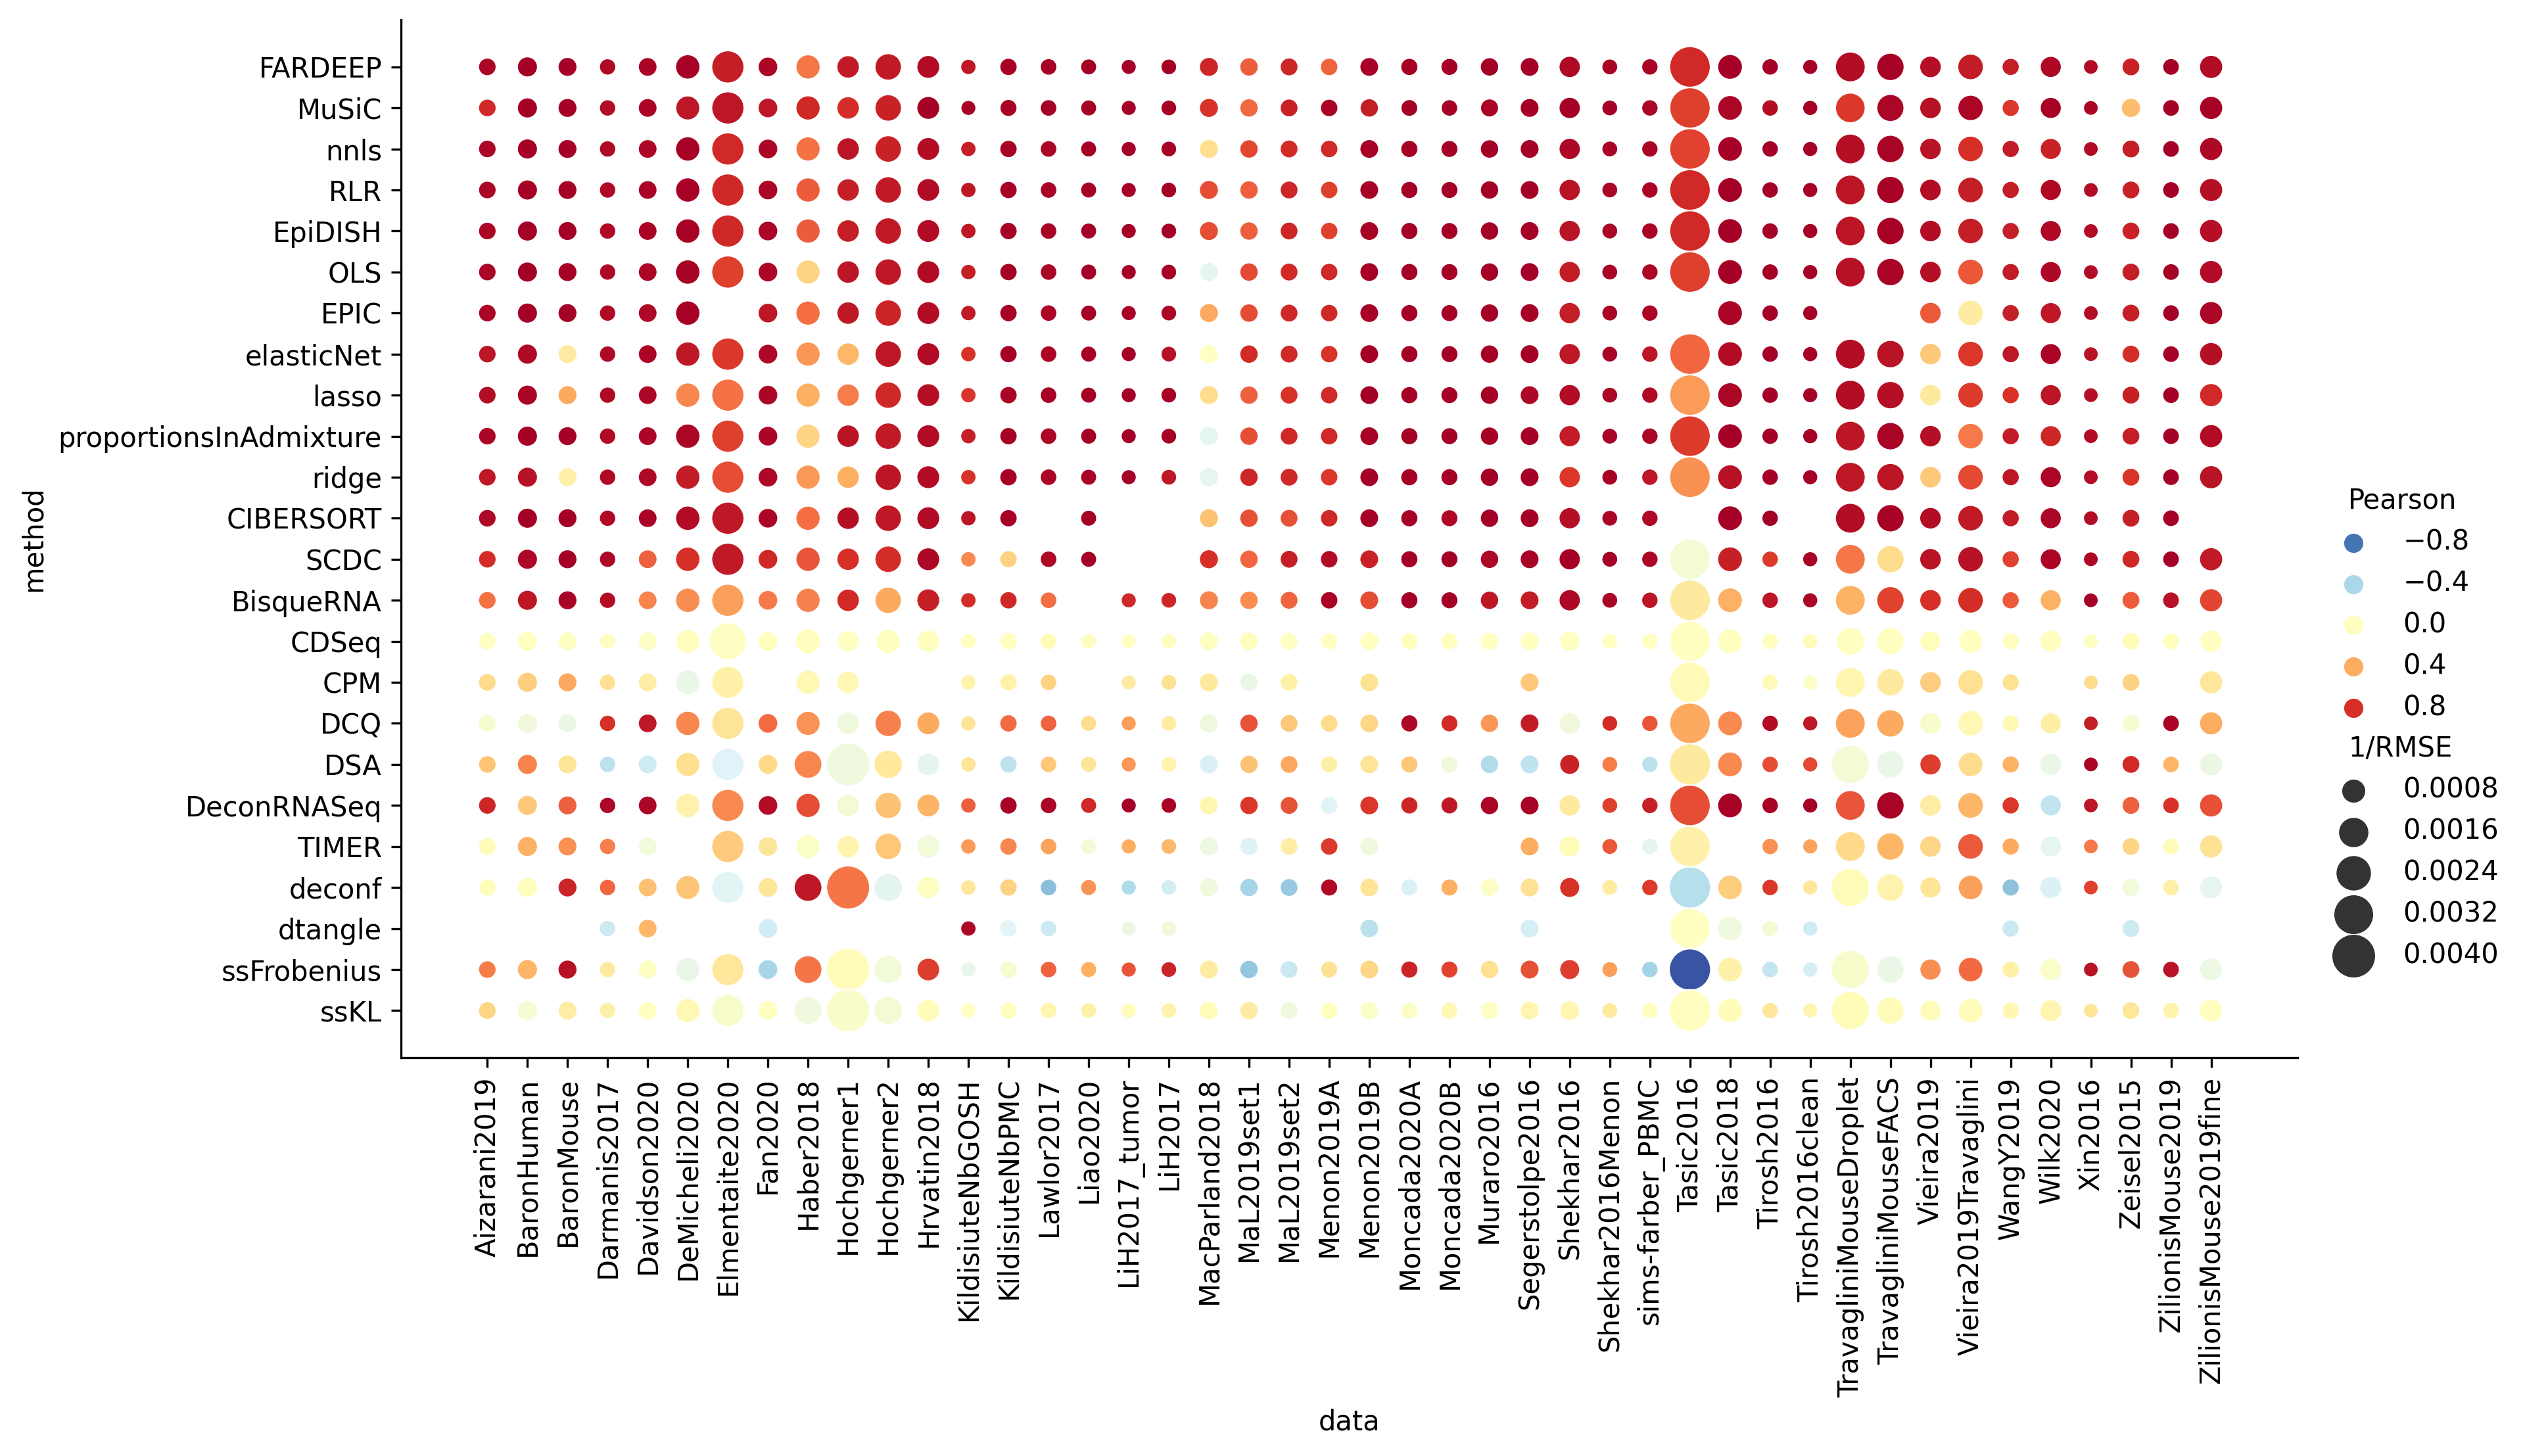

In [115]:
ax = sns.relplot(data = df, x = 'data', y='method', size = '1/RMSE', hue='Pearson', hue_norm=(-1, 1),\
            height=6, aspect=2, sizes=(30, 250), palette='RdYlBu_r')
ax.set_xticklabels(rotation=90)
# plt.savefig('figdata/FigS3.pdf')